In [4]:
import matplotlib.pyplot as plt
from scipy import stats, optimize
import numpy as np
import pandas as pd
np.set_printoptions(precision=2, floatmode="fixed")

# An example: Making decisions as newspaper vendor

1. Anisha is starting her new enterprise
2. She buys them wholesale for 5 dollars and sells them for 7 dollars.
3. Newspapers only last one day, they become worthless the next day.
4. Each morning she must make a choice of how many to purchase.
5. If she buys too little she loses an opportunity to sell, if she buys too many she wastes money on unsold papers.

## How many should she purchase in the morning to maximize her profit?

In [8]:
purchase = 5
sell = 7
demand = 40


In [83]:
def get_income(inventory, demand, paper_cost=5, paper_sp=7):
    # paper_cost = np.array(paper_cost)
    # paper_sp = np.array(paper_sp)
    # demand = np.array(demand)
    # inventory = np.array(inventory)

    obj_min = (paper_sp * np.min([demand, inventory]) -
                (paper_cost * inventory))

    # print(f"income is {obj_min}")

    return obj_min


In [84]:
def daily_profit(inventory, demand, paper_cost=5, paper_sp = 7):
    """Calculates profit for a given day given inventory and demand"""
    return paper_sp*np.min([inventory, demand]) - paper_cost*inventory

In [85]:
daily_profit(demand=42, inventory=42)

84

## Plot of income vs demand

### For varying demand

In [86]:
demands = np.linspace(start = 0, stop = 100)
incomes = [daily_profit(demand=dem, inventory=42) for dem in demands]

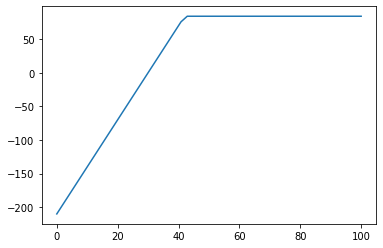

In [87]:
plt.plot(demands, income)

### For varying inventory

In [88]:
invs = np.linspace(start = 0, stop = 100)
incomes = [daily_profit(demand=40, inventory=inv) for inv in invs]

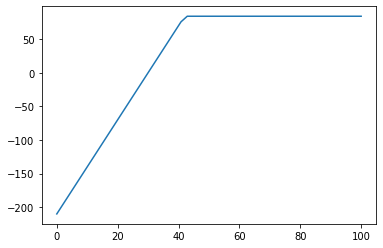

In [62]:
plt.plot(invs, incomes)

# Objective function

In [92]:
def objective(inventory: int, demands: iter):
    """Takes an iterable of demand values and returns the total profit"""
    objective_function_value =  -np.sum([daily_profit(inventory, d) for d in demands])
    print(f"Inventory value {inventory} with demands array {demands} yields Objective Value {objective_function_value}")
    # Make reward function negative to turn this into a minimization problem
    return objective_function_value

In [99]:
objective(demands=[98], inventory=40)#, paper_cost=5, paper_sp=7)


Inventory value 40 with demands array [98] yields Objective Value -80


-80

## Stochastic optimization

In [96]:
# Let scipy find minimie objective function (negative profit) if demands is set to 40
opt_stoch = optimize.minimize_scalar(objective, bounds=(0, np.inf), args=([40, 40]))
opt_stoch

Inventory value 0.0 with demands array [40, 40] yields Objective Value -0.0
Inventory value 1.0 with demands array [40, 40] yields Objective Value -4.0
Inventory value 2.6180339999999998 with demands array [40, 40] yields Objective Value -10.472135999999995
Inventory value 178.98373999999998 with demands array [40, 40] yields Objective Value 1229.8374
Inventory value 2.6180339999999998 with demands array [40, 40] yields Objective Value -10.472135999999995
Inventory value 69.983737257996 with demands array [40, 40] yields Objective Value 139.83737257995995
Inventory value 28.3494422106437 with demands array [40, 40] yields Objective Value -113.3977688425748
Inventory value 28.84680861337978 with demands array [40, 40] yields Objective Value -115.38723445351911
Inventory value 44.55971670004926 with demands array [40, 40] yields Objective Value -114.40283299950744
Inventory value 36.578275115766075 with demands array [40, 40] yields Objective Value -146.3131004630643
Inventory value 36.6

     fun: -159.9999981773509
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 43
     nit: 38
 success: True
       x: 40.00000018226491